In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import utils

import os, sys, datetime, glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nibabel as nib

In [4]:
nib.__version__

'2.4.1'

In [5]:
confounds_file = "/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-01_bold_confounds.tsv"

In [6]:
confounds = pd.read_csv(confounds_file, sep=str('\t'), na_values="n/a")

In [7]:
confounds.head()

,CSF,WhiteMatter,GlobalSignal,stdDVARS,non-stdDVARS,vx-wisestdDVARS,FramewiseDisplacement,tCompCor00,tCompCor01,tCompCor02,...,aCompCor02,aCompCor03,aCompCor04,aCompCor05,X,Y,Z,RotX,RotY,RotZ
0,885.871357,503.595579,557.033395,NaN,NaN,NaN,NaN,-0.414925,-0.048620,0.220810,...,-0.068091,0.139640,-0.124760,0.086382,-0.005354,-0.013263,0.005651,-0.000386,-0.000175,0.000000
1,876.080853,502.588044,555.419735,1.433077,57.380936,1.391353,0.142057,0.470042,0.261791,0.302930,...,-0.248427,0.310168,0.431133,-0.071346,0.013718,-0.097564,-0.000102,-0.000281,0.000364,0.000015
2,875.519813,503.127911,555.839419,1.418307,56.789520,1.421325,0.237072,-0.347905,0.193457,-0.352137,...,-0.284395,-0.378987,0.132116,0.348264,0.014389,0.091136,-0.000203,0.000107,0.000038,0.000253
3,878.682844,503.709593,554.516601,1.355823,54.287628,1.297563,0.125720,0.364036,-0.562871,-0.001585,...,0.147343,-0.572464,-0.226084,-0.149295,0.020885,0.010874,-0.006213,0.000424,0.000318,0.000314
4,876.298039,502.520414,552.242120,1.348576,53.997486,1.286893,0.069611,-0.025929,-0.190799,0.619387,...,-0.308914,-0.151031,-0.159532,-0.650114,0.007918,0.047034,-0.006913,0.000338,0.000318,0.000004


### Fix the event files

In [6]:
import glob

In [7]:
ls /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/

sub-NB_ses-20180803_task-mp_run-01_bold.json
sub-NB_ses-20180803_task-mp_run-01_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-02_bold.json
sub-NB_ses-20180803_task-mp_run-02_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-02_events.tsv*
sub-NB_ses-20180803_task-mp_run-03_bold.json
sub-NB_ses-20180803_task-mp_run-03_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-03_events.tsv*
sub-NB_ses-20180803_task-mp_run-04_bold.json
sub-NB_ses-20180803_task-mp_run-04_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-04_events.tsv*
sub-NB_ses-20180803_task-mp_run-05_bold.json
sub-NB_ses-20180803_task-mp_run-05_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-05_events.tsv*
sub-NB_ses-20180803_task-mp_run-06_bold.json
sub-NB_ses-20180803_task-mp_run-06_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-06_events.tsv*
sub-NB_ses-20180803_task-mp_run-07_bold.json
sub-NB_ses-20180803_task-mp_run-07_bold.nii.gz
sub-NB_ses-20180803_task-mp_run-07_events.tsv*
sub-NB_ses-20180803_task-mp_run-08_bold.json
sub-NB_ses-20180803_task-mp_r

In [8]:
efiles = glob.glob("/Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb*events.tsv")

In [9]:
ls

NB_20180524 Coherence Hemifield.ipynb
Processing NB_20180524 data (GLM hemi, MP).ipynb
Processing NB_20180803 data (GLM MP).ipynb
Testing streams repo and glm_code features.ipynb
__pycache__/
assign_mp.py
cope1_masked.nii.gz
glm_fixedeffects_level12.py
utils.py


In [42]:
for file in efiles:
    s = "run-"
    pieces = file.split(s)
    stem = pieces[0].split("/")[-1] + s
    stem = stem.replace("sub-nb", "sub-NB")
    runnum_old = int(pieces[-1].split("_")[0])
    runnum_new = runnum_old + 1
    print(f"cp {file} ./{stem}{str(runnum_new).zfill(2)}_events.tsv")

cp /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb_ses-20180803_task-mp_run-08_events.tsv ./sub-NB_ses-20180803_task-mp_run-09_events.tsv
cp /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb_ses-20180803_task-mp_run-05_events.tsv ./sub-NB_ses-20180803_task-mp_run-06_events.tsv
cp /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb_ses-20180803_task-mp_run-02_events.tsv ./sub-NB_ses-20180803_task-mp_run-03_events.tsv
cp /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb_ses-20180803_task-mp_run-07_events.tsv ./sub-NB_ses-20180803_task-mp_run-08_events.tsv
cp /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb_ses-20180803_task-mp_run-09_events.tsv ./sub-NB_ses-20180803_task-mp_run-10_events.tsv
cp /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-nb_ses-20180803_task-mp_run-04_events.tsv ./sub-NB_ses-20180803_task-mp_run-05_events.tsv
cp /Users/smerdis/data

## GLM invocation from a cell

In [8]:
raw_data_dir = os.path.abspath("/Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/")

In [9]:
out_dir = os.path.abspath('/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/')

In [10]:
fmriprep_dir = os.path.abspath(os.path.join(out_dir, 'fmriprep'))

In [11]:
sub = "NB"
ses = "20180803"
task = "mp"

In [12]:
utils.get_files(sub, ses, task, raw_data_dir, fmriprep_dir, run=[2, 10])

BOLDS: 2
['/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02_bold_space-T1w_preproc.nii.gz', '/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-10_bold_space-T1w_preproc.nii.gz']
Masks: 2
['/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02_bold_space-T1w_brainmask.nii.gz', '/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-10_bold_space-T1w_brainmask.nii.gz']
Eventfiles: 2
['/Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02_events.tsv', '/Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-10_events.tsv']
[2.25, 2.25] 2
Confounds: 2
['/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803

(['/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02_bold_space-T1w_preproc.nii.gz',
  '/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-10_bold_space-T1w_preproc.nii.gz'],
 ['/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02_bold_space-T1w_brainmask.nii.gz',
  '/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-10_bold_space-T1w_brainmask.nii.gz'],
 ['/Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02_events.tsv',
  '/Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-10_events.tsv'],
 2.25,
 ['/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-02

In [13]:
command = f"python glm_fixedeffects_level12.py {raw_data_dir} {out_dir} {sub} {ses} {task} T1w \"{list(range(2,11))}\""

In [14]:
print(command)

python glm_fixedeffects_level12.py /Users/smerdis/data/LGN/BIDS/NB_20180803/sub-NB /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives NB 20180803 mp T1w "[2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [17]:
anat = os.path.join(fmriprep_dir, f"sub-{sub}", 'anat', f"sub-{sub}_T1w_preproc.nii.gz")
#mrvanat = os.path.join(out_dir, "mrvista", "T1w.nii.gz")
func = os.path.join(fmriprep_dir, f"sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-{task}_run-01_bold_space-T1w_preproc.nii.gz")
#vROI = os.path.join(out_dir, "mrvista", "vROI1.nii.gz")
#mROI = os.path.join(fmriprep_dir, f"sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-{task}_run-01_lLGN_roi_manual.nii.gz")


In [18]:
wf_dir = f"{out_dir}/nipype_{sub}_{ses}_{task}/hemifield/modelfit"
datasink_dir = os.path.join(wf_dir, 'datasink')
print(datasink_dir)

/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink


In [19]:
!ls "{datasink_dir}"

_0x6b17a8359c85524b0f50a5ffa060f701.json
_inputs.pklz
_node.pklz
_report
design_file
design_image
epi_masked_trimmed
result_datasink.pklz
results_dir
stats_dir


In [20]:
utils.view_results(datasink_dir, [3], anat, func)

fsleyes /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/anat/sub-NB_T1w_preproc.nii.gz /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/fmriprep/sub-NB/ses-20180803/func/sub-NB_ses-20180803_task-mp_run-01_bold_space-T1w_preproc.nii.gz  /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/results_dir/_modelestimate0/results/cope3.nii.gz /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/results_dir/_modelestimate1/results/cope3.nii.gz /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/results_dir/_modelestimate2/results/cope3.nii.gz /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/results_dir/_modelestimate3/results/cope3.nii.gz /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/results_dir/_modelestimate4/

### LGN region drawing/manipulation!

In [22]:
roi = "/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/stats_dir/_flameo2/stats/R-LGN-manual.nii.gz"

In [23]:
img = nib.load(roi)

In [24]:
imgdata = img.get_data()

In [25]:
np.count_nonzero(imgdata)

65

### Plotting stat maps

In [18]:
from nilearn.plotting import plot_stat_map

In [19]:
cc=(22, -16, -10)

In [20]:
tstat = "/Users/smerdis/data/LGN/BIDS/NB_20180524/derivatives/nipype_NB_20180524_mp/hemifield/modelfit/datasink/results_dir/_modelestimate4/results/cope3.nii.gz"

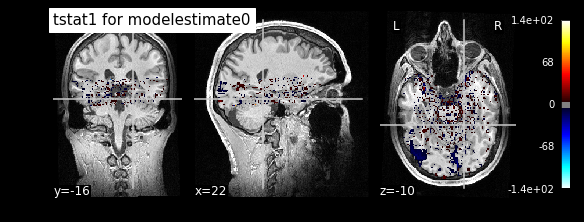

In [21]:
plot_stat_map(
    tstat, title='tstat1 for modelestimate0',
    bg_img=anat, threshold=5, cut_coords=cc, display_mode='ortho', dim=-1)

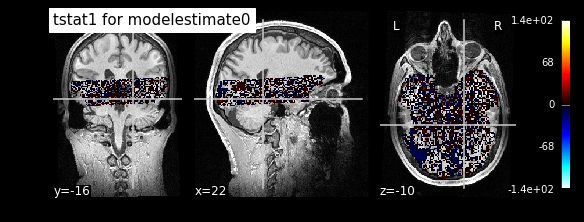

In [22]:
plot_stat_map(
    tstat, title='tstat1 for modelestimate0',
    bg_img=anat, threshold=1.5, cut_coords=cc, display_mode='ortho', dim=-1)

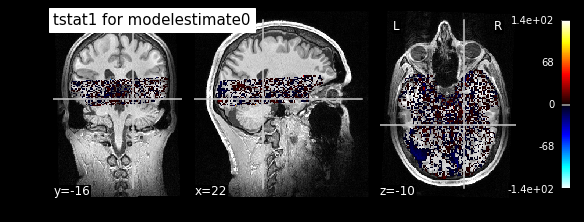

In [23]:
plot_stat_map(
    tstat, title='tstat1 for modelestimate0',
    bg_img=anat, threshold=2, cut_coords=cc, display_mode='ortho', dim=-1)

In [ ]:
plot_stat_map(
    tstat, title='tstat1 for modelestimate0',
    bg_img=anat, threshold=2, display_mode='x', cut_coords=range(20, 27), dim=-1, output_file='lgn_slices_x_thr2.png')

In [ ]:
plot_stat_map(
    tstat, title='tstat1 for modelestimate0',
    bg_img=anat, threshold=2, display_mode='y', cut_coords=range(-18, -14), dim=-1, output_file='lgn_slices_y_thr2.png')

## Coherence analysis to identify LGN voxels responding at flicker frequency

In [24]:
bold_file = f"{fmriprep_dir}/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-hemi_run-04_bold_space-T1w_preproc.nii.gz"

In [25]:
img = nib.load(bold_file)

In [26]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  81 102  92 139   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [ 1.          1.75        1.75        1.57500005  2.25        1.          1.
  1.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 8
cal_max         : 3323.630859375
cal_min         : -67.41256713867188
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v0.4.1).'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
qu

In [28]:
img_data = img.get_fdata()

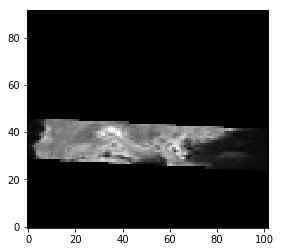

In [53]:
plt.imshow(img_data[26, :, :, 44].T, cmap="gray", origin="lower")

In [54]:
nvox = img.shape[0] * img.shape[1] * img.shape[2]

In [55]:
n_timepoints = img.shape[-1]

In [56]:
print(nvox, n_timepoints)

760104 139


In [32]:
img_flat = np.reshape(img_data, (nvox, -1))

In [33]:
img_flat[:10, 0]

array([ 0.00984291,  0.00984291,  0.00984291,  0.00984291,  0.00984291,
        0.00984291,  0.00984291,  0.00984291,  0.00984291,  0.00984291])

(6255,)


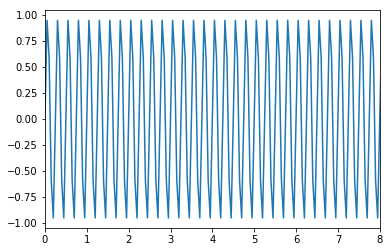

In [64]:
TR = 2.25 # seconds
freq = 4 # Hz
total_len = img.shape[-1]*TR # seconds
fig, ax = plt.subplots(1)
t = np.arange(0.0, total_len, 0.05)
sinusoid = np.sin(freq*2*np.pi*t)
print(sinusoid.shape)

ax.set_xlim(0, 8)
ax.plot(t, sinusoid)

In [42]:
2.25*139

312.75

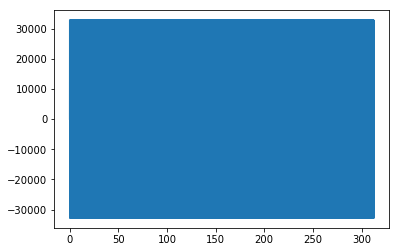

In [48]:
plt.plot(samples, signal)

## Assigning voxels within an ROI to M/P

In [26]:
copefile = '/Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/stats_dir/_flameo2/stats/cope1.nii.gz'
ROIfile = roi # manual R-LGN for NB 20180803

In [27]:
def assign_mp_command(cope, roimask, pct_thresh, roi_below, roi_above, out_dir=None):
    if out_dir is None:
        out_dir = os.path.dirname(roimask)
    print(f"python assign_mp.py {cope} {roimask} {pct_thresh} {roi_below} {roi_above} {out_dir}")

def assign_voxels(infile, rois, split_pct):
    """Assign voxels to an ROI based on the percentile of intensity they fall in.
    
    rois should be a list of length 2, split_pcts should be a list of length 1
    
    e.g. assign_voxels_percentile(infile, ['M', 'P'], 80)"""
    from nipype.interfaces.fsl import ImageMaths
    stats = ImageMaths()
    stats.inputs.in_file = infile
    stats.inputs.op_string = f"-thr {split_pct} -bin {roi_above}"
    print(stats.cmdline)

In [28]:
assign_mp_command(copefile, ROIfile, 80, 'M', 'P')

python assign_mp.py /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/stats_dir/_flameo2/stats/cope1.nii.gz /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/stats_dir/_flameo2/stats/R-LGN-manual.nii.gz 80 M P /Users/smerdis/data/LGN/BIDS/NB_20180803/derivatives/nipype_NB_20180803_mp/hemifield/modelfit/datasink/stats_dir/_flameo2/stats


In [ ]:
masked_cope = '/Users/smerdis/data/LGN/BIDS/MS_LGN_fp107/nipype_MS_20150401_hemi/hemifield/modelfit/datasink/cope_masked.nii.gz'

In [ ]:
assign_voxels_percentile(masked_cope, ['M', 'P'], 80)